<a href="https://colab.research.google.com/github/ehcdc1967/Proyectos-de-Inversion/blob/main/RANDO_FOREST_hiperpar%C3%A1metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('https://raw.githubusercontent.com/ehcdc1967/Proyectos-de-Inversion/main/poblacion.parquet')
df.drop(columns=['CODIGO_UNICO'], inplace=True, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SOBRECOSTO               52416 non-null  float64 
 1   FUNCION                  52416 non-null  object  
 2   TIEMPO_VIABILIDAD        52416 non-null  float64 
 3   TIEMPO_EJECUCION         52416 non-null  float64 
 4   BENEFICIARIO             52416 non-null  float64 
 5   CTRL_CONCURR             52416 non-null  float64 
 6   MONTO_LAUDO              52416 non-null  float64 
 7   NATURALEZA_MEJORAMIENTO  52416 non-null  float64 
 8   NATURALEZA_AMPLIACION    52416 non-null  float64 
 9   NATURALEZA_RECUPERACION  52416 non-null  float64 
 10  NATURALEZA_CREACION      52416 non-null  float64 
 11  MODALIDAD_DIRECTA        52416 non-null  float64 
 12  MODALIDAD_INDIRECTA      52416 non-null  float64 
 13  MODIFICACION_F8          52416 non-null  float64 
 14  EXPEDI

In [ ]:
# Elimino las columnas irrelevantes y maneje los valores faltantes
df.dropna(inplace=True)

In [ ]:
# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['FUNCION', 'DPTO', 'TIPO_MUNICIPALIDAD'], drop_first=True)
df = df.drop(columns=['CODIGO_UNICO'], errors='ignore')

In [ ]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['SOBRECOSTO'], errors='ignore')
y = df['SOBRECOSTO']

In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.2 , random_state=2024 )

In [ ]:
# Estandarizar variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Inicio el modelo de Random Forest y ajustarlo a los datos de entrenamiento
classifier = RandomForestClassifier(random_state=2024)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

In [ ]:
# Predict on test data
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred)

In [ ]:
class_report

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      7878\n         1.0       0.99      0.94      0.96      2606\n\n    accuracy                           0.98     10484\n   macro avg       0.98      0.97      0.97     10484\nweighted avg       0.98      0.98      0.98     10484\n'

In [ ]:
# Feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)


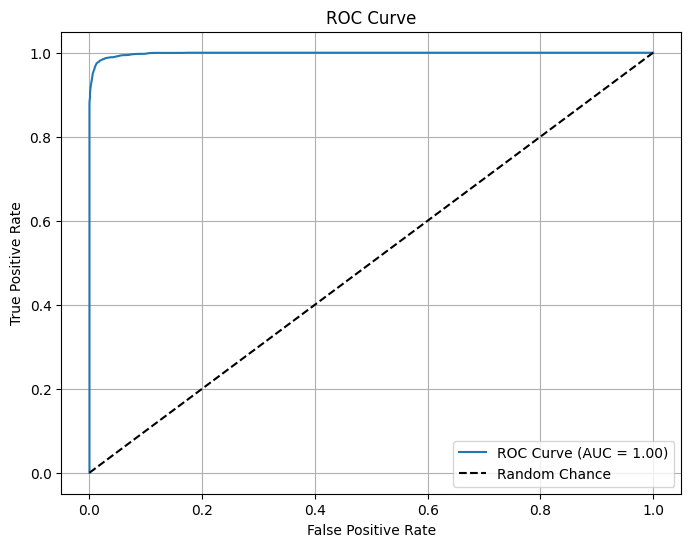

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Mostrar los resultados de importancia de características en una tabla
import pandas as pd

# Asegúrate de que `feature_importances` es un DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Imprimir los resultados en la consola
print("Feature Importance from Random Forest:")
print(feature_importances)

# Opcional: Guardar el resultado en un archivo CSV para análisis adicional
feature_importances.to_csv("feature_importances.csv", index=False)


Feature Importance from Random Forest:
                                 Feature    Importance
14                       RATIO_ET_VIABLE  5.201291e-01
15                        RATIO_ET_COSTO  2.057893e-01
12                    EXPEDIENTE_TECNICO  1.385241e-01
2                           BENEFICIARIO  1.767667e-02
1                       TIEMPO_EJECUCION  1.537051e-02
..                                   ...           ...
27                         FUNCION_PESCA  1.260289e-05
33                       FUNCION_TRABAJO  6.465517e-06
26                         FUNCION_OTROS  2.570494e-10
23                     FUNCION_INDUSTRIA  0.000000e+00
20  FUNCION_DEFENSA Y SEGURIDAD NACIONAL  0.000000e+00

[67 rows x 2 columns]


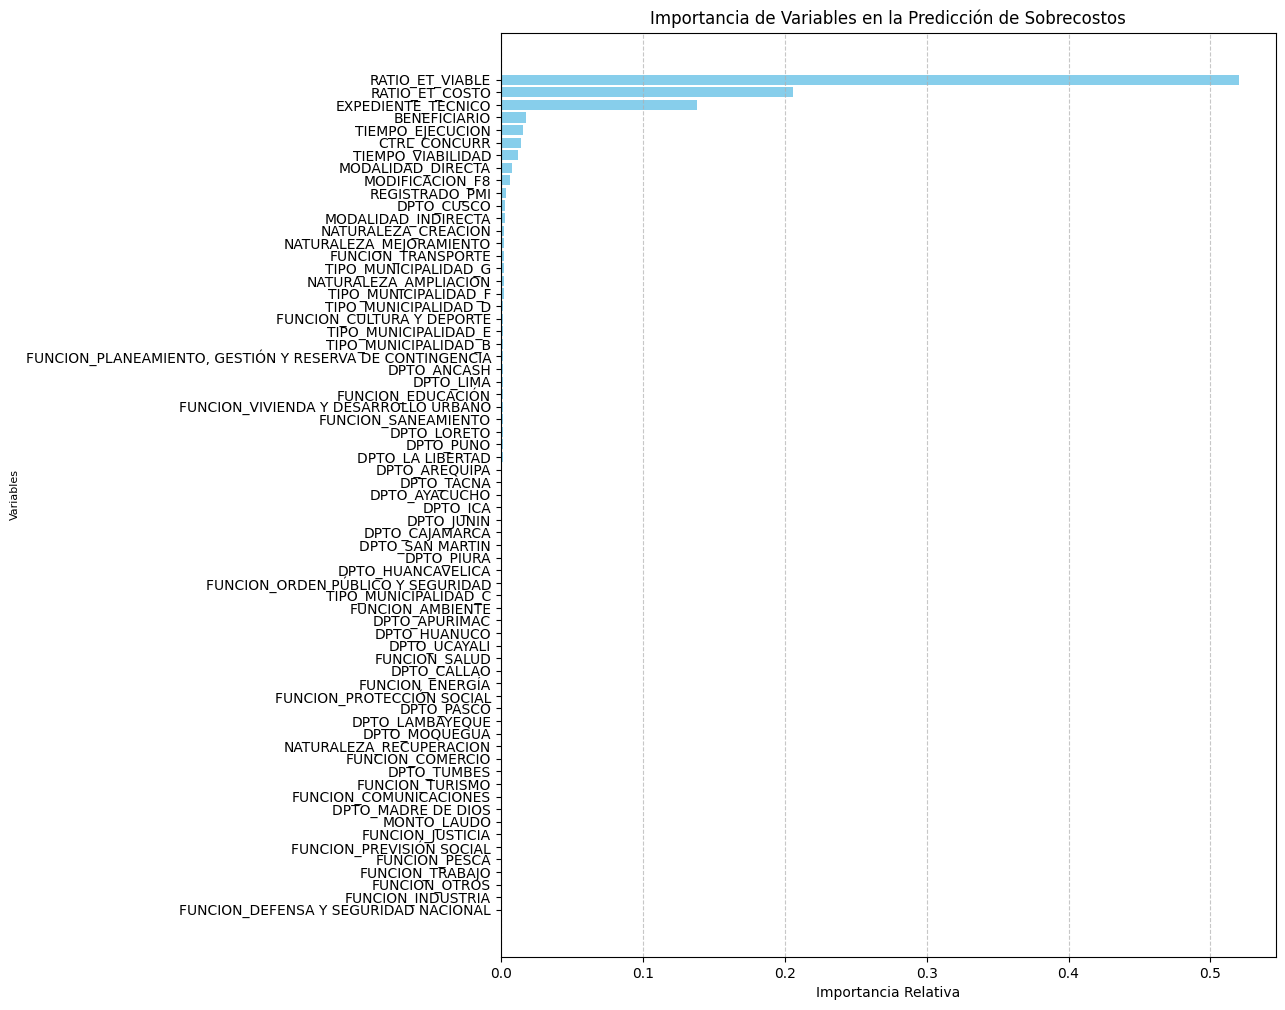

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico
plt.figure(figsize=(10,12))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables', fontsize=8)  # Reducir el tamaño de la etiqueta del eje y si es necesario
plt.title('Importancia de Variables en la Predicción de Sobrecostos')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from IPython.display import display, HTML
accuracy, conf_matrix, roc_auc, class_report

(0.9813048454788249,
 array([[7842,   36],
        [ 160, 2446]]),
 0.9985151534812258,
 '              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      7878\n         1.0       0.99      0.94      0.96      2606\n\n    accuracy                           0.98     10484\n   macro avg       0.98      0.97      0.97     10484\nweighted avg       0.98      0.98      0.98     10484\n')

In [ ]:
from IPython.core.display import display, HTML
# Convertir el texto a HTML
formatted_report = f"<pre>{class_report}</pre>"
# Mostrar el HTML en Colab
display(HTML(formatted_report))